In [ ]:
def isnan(value):
  try:
      import math
      return math.isnan(float(value))
  except:
      return False

In [ ]:
sum_sensitivity=0
mean_sensitivity=0

sum_dice=0
mean_dice=0
a=0
for i in range(0,len(seg_tam_test)):
  pred_tam = model_tam.predict(np.expand_dims(x_test[i,:,:,:],axis=0))
  t1ce_tam = pred_tam[0] * t1ce_test[i]
  expand_img = np.expand_dims(t1ce_tam,axis=0)
  pred_ödemsiz = model_ödemsiz.predict(expand_img)
  t1ce_ödemsiz = pred_ödemsiz[0]*t1ce_test[i]
  expand_img = np.expand_dims(t1ce_ödemsiz,axis=0)
  pred_geniş = model_genis.predict(expand_img)
  dice = compute_dice(pred_ödemsiz[0,0,:,:],seg_ödemsiz_test[i,0,:,:])
  r = sensitivity(pred_ödemsiz[0,0,:,:],seg_ödemsiz_test[i,0,:,:])
  sum_dice = sum_dice + dice
  if isnan(r) == False:
    sum_sensitivity = r + sum_sensitivity
    a=a+1


mean_dice = sum_dice / len(seg_ödemsiz_test)
mean_sensitivity = sum_sensitivity / a


print(mean_dice, mean_sensitivity)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app


0.674109760515483 0.670677525028057


In [ ]:
sum_sensitivity=0
mean_sensitivity=0

sum_dice=0
mean_dice=0
a=0
for i in range(0,len(seg_tam_test)):
  pred_tam = model_tam.predict(np.expand_dims(x_test[i,:,:,:],axis=0))
  t1ce_tam = pred_tam[0] * t1ce_test[i]
  expand_img = np.expand_dims(t1ce_tam,axis=0)
  pred_ödemsiz = model_ödemsiz.predict(expand_img)
  t1ce_ödemsiz = pred_ödemsiz[0]*t1ce_test[i]
  expand_img = np.expand_dims(t1ce_ödemsiz,axis=0)
  pred_geniş = model_genis.predict(expand_img)
  dice = compute_dice(pred_tam[0,0,:,:],seg_tam_test[i,0,:,:])
  r = sensitivity(pred_tam[0,0,:,:],seg_tam_test[i,0,:,:])
  sum_dice = sum_dice + dice
  if isnan(r) == False:
    sum_sensitivity = r + sum_sensitivity
  else:
    r=0
    sum_sensitivity = r + sum_sensitivity

mean_dice = sum_dice / len(seg_ödemsiz_test)
mean_sensitivity = sum_sensitivity / len(seg_tam_test)


print(mean_dice, mean_sensitivity)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app


0.8322886307316949 0.8142529513584802


In [ ]:
sum=0
a=0
mean=0
for i in range(0,len(seg_tam_test)):
  a=sensitivity(pred_tam[i][0],seg_tam_test[i][0])
  if isnan(a) == False:
    sum=a+sum
mean=sum/len(seg_tam_test)
print(mean)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app


0.8142529568463687


In [ ]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
import glob
import cv2

In [ ]:
!pip install simpleitk

     |████████████████████████████████| 47.4MB 116kB/s 


In [ ]:
import numpy as np
import random as r
import glob

def train_array(path,end):
    files = glob.glob(path+end,recursive=True)
    img_liste = []
    r.seed(9)
    r.shuffle(files)
    for file in files:
        img = io.imread(file, plugin='simpleitk')
        img = (img-img.mean())/ img.std()
        img = img.astype(np.float32)

        for slice in range(50,130):
            img_s = img[slice,:,:]
            img_s = cv2.resize(img_s, (240,240))
            img_s = np.expand_dims(img_s,axis=0)
            img_liste.append(img_s)

    return np.array(img_liste)

In [ ]:
t1ce = train_array('/content/drive/MyDrive/project/Unet_Brain_tumor_segmentation/MICCAI_BraTS2020_TrainingData/','**/*t1ce_nb4.nii.gz')

In [ ]:
t1ce_test = train_array('/content/drive/MyDrive/MICCAI_BraTS2020_TestingData/','**/*t1ce_nb4.nii.gz')

In [ ]:
import numpy as np
import random as r

def seg_array(path,end,label):
    files = glob.glob(path+end,recursive=True)
    img_liste = []
    r.seed(9)
    r.shuffle(files)
    for file in files:
        img = io.imread(file, plugin='simpleitk')

        if label == 1:
          img[img != 0] = 1 #tam tümör
        elif label == 2:
          img[img != 1] = 0 #nekroz
        elif label == 3:
          img[img == 2] = 0
          img[img != 0] = 1 #ödemsiz tümör
        elif label == 4:
          img[img != 4] = 0
          img[img == 4] = 1 #genişleyen tümör

        img=img.astype(np.float32)

        for slice in range(50,130):
            img_s = img[slice,:,:]
            img_s = cv2.resize(img_s, (240,240))
            img_s = np.expand_dims(img_s,axis=0)
            img_liste.append(img_s)

    return np.array(img_liste)

In [ ]:
seg_tam = seg_array('/content/drive/MyDrive/project/Unet_Brain_tumor_segmentation/MICCAI_BraTS2020_TrainingData/','**/*seg.nii.gz',1)

In [ ]:
seg_tam_test = seg_array('/content/drive/MyDrive/MICCAI_BraTS2020_TestingData/','**/*seg.nii.gz',1)

In [ ]:
seg_nekroz = seg_array('/content/drive/MyDrive/MICCAI_BraTS2020_TrainingData/','**/*seg.nii.gz',2)

In [ ]:
seg_nekroz_test = seg_array('/content/drive/MyDrive/MICCAI_BraTS2020_TestingData/','**/*seg.nii.gz',2)

In [ ]:
seg_ödemsiz = seg_array('/content/drive/MyDrive/project/Unet_Brain_tumor_segmentation/MICCAI_BraTS2020_TrainingData/','**/*seg.nii.gz',3)

In [ ]:
seg_ödemsiz_test = seg_array('/content/drive/MyDrive/MICCAI_BraTS2020_TestingData/','**/*seg.nii.gz',3)

In [ ]:
seg_geniş = seg_array('/content/drive/MyDrive/project/Unet_Brain_tumor_segmentation/MICCAI_BraTS2020_TrainingData/','**/*seg.nii.gz',4)

In [ ]:
seg_geniş_test = seg_array('/content/drive/MyDrive/MICCAI_BraTS2020_TestingData/','**/*seg.nii.gz',4)

In [ ]:
seg_orj = seg_array('/content/drive/MyDrive/project/Unet_Brain_tumor_segmentation/MICCAI_BraTS2020_TrainingData/','**/*seg.nii.gz',0)

In [ ]:
seg_orj = seg_array('/content/drive/MyDrive/MICCAI_BraTS2020_TestingData/','**/*seg.nii.gz',0)

In [ ]:
!unzip /content/drive/MyDrive/t1ce_ödemsiz.zip

Archive:  /content/drive/MyDrive/t1ce_ödemsiz.zip
  inflating: t1ce_ödemsiz.npy       
  inflating: t1ce_ödemsiz_test.npy  


In [ ]:
!unzip /content/drive/MyDrive/x_test.zip

Archive:  /content/drive/MyDrive/x_test.zip
  inflating: x_test.npy              


In [ ]:
x_test = np.load ('x_test.npy')

In [ ]:
t1ce_tam_test = np.load ('t1ce_ödemsiz_test.npy')

In [ ]:
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import concatenate, Conv2D, MaxPooling2D, Conv2DTranspose
from keras.layers import Input, merge, UpSampling2D,BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import tensorflow as tf


def dice_coef(y_true, y_pred):
    smooth = 0.005
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

K.set_image_data_format('channels_first')

def unet_plusplus_model():

    inputs = Input((1, 240 , 240))

    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same') (inputs)
    batch1 = BatchNormalization(axis=1)(conv1)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same') (batch1)
    batch1 = BatchNormalization(axis=1)(conv1)
    pool1 = MaxPooling2D((2, 2)) (batch1)

    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same') (pool1)
    batch2 = BatchNormalization(axis=1)(conv2)
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same') (batch2)
    batch2 = BatchNormalization(axis=1)(conv2)
    pool2 = MaxPooling2D((2, 2)) (batch2)

    up3 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (conv2)
    up3 = concatenate([up3, conv1], axis=1)
    conv3 = Conv2D(64, (3, 3), activation='relu', padding='same') (up3)
    batch3 = BatchNormalization(axis=1)(conv3)
    conv3 = Conv2D(64, (3, 3), activation='relu', padding='same') (batch3)
    batch3 = BatchNormalization(axis=1)(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same') (pool2)
    batch4 = BatchNormalization(axis=1)(conv4)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same') (batch4)
    batch4 = BatchNormalization(axis=1)(conv4)
    pool3 = MaxPooling2D(pool_size=(2, 2)) (batch4)

    up5 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (conv4)
    up5 = concatenate([up5, conv2], axis=1)
    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same') (up5)
    batch5 = BatchNormalization(axis=1)(conv5)
    conv5 = Conv2D(128, (3, 3), activation='relu', padding='same') (batch5)
    batch5 = BatchNormalization(axis=1)(conv5)

    up6 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (conv5)
    up6 = concatenate([up6, conv1, conv3], axis=1)
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same') (up6)
    batch6 = BatchNormalization(axis=1)(conv6)
    conv6 = Conv2D(64, (3, 3), activation='relu', padding='same') (batch6)
    batch6 = BatchNormalization(axis=1)(conv6)

    conv7 = Conv2D(512, (3, 3), activation='relu', padding='same') (pool3)
    batch7 = BatchNormalization(axis=1)(conv7)
    conv7 = Conv2D(512, (3, 3), activation='relu', padding='same') (batch7)
    batch7 = BatchNormalization(axis=1)(conv7)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv7)


    up8 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same') (conv7)
    up8 = concatenate([up8, conv4], axis=1)
    conv8 = Conv2D(256, (3, 3), activation='relu', padding='same') (up8)
    batch8 = BatchNormalization(axis=1)(conv8)
    conv8 = Conv2D(256, (3, 3), activation='relu', padding='same') (batch8)
    batch8 = BatchNormalization(axis=1)(conv8)

    up9 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (conv8)
    up9 = concatenate([up9, conv2, conv5], axis=1)
    conv9 = Conv2D(128, (3, 3), activation='relu', padding='same') (up9)
    batch9 = BatchNormalization(axis=1)(conv9)
    conv9 = Conv2D(128, (3, 3), activation='relu', padding='same') (batch9)
    batch9 = BatchNormalization(axis=1)(conv9)

    up10 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (conv9)
    up10 = concatenate([up10, conv1, conv3, conv6], axis=1)
    conv10 = Conv2D(64, (3, 3), activation='relu', padding='same') (up10)
    batch10 = BatchNormalization(axis=1)(conv10)
    conv10 = Conv2D(64, (3, 3), activation='relu', padding='same') (batch10)
    batch10 = BatchNormalization(axis=1)(conv10)

    conv11 = Conv2D(1024, (3, 3), activation='relu', padding='same') (pool4)
    batch11 = BatchNormalization(axis=1)(conv11)
    conv11 = Conv2D(1024, (3, 3), activation='relu', padding='same') (batch11)
    batch11 = BatchNormalization(axis=1)(conv11)

    up12 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same') (conv11)
    up12 = concatenate([up12, conv7], axis=1)
    conv12 = Conv2D(512, (3, 3), activation='relu', padding='same') (up12)
    batch12 = BatchNormalization(axis=1)(conv12)
    conv12 = Conv2D(512, (3, 3), activation='relu', padding='same') (batch12)
    batch12 = BatchNormalization(axis=1)(conv12)

    up13 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same') (conv12)
    up13 = concatenate([up13, conv4, conv8], axis=1)
    conv13 = Conv2D(256, (3, 3), activation='relu', padding='same') (up13)
    batch13 = BatchNormalization(axis=1)(conv13)
    conv13 = Conv2D(256, (3, 3), activation='relu', padding='same') (batch13)
    batch13 = BatchNormalization(axis=1)(conv13)

    up14 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (conv13)
    up14 = concatenate([up14, conv2, conv5, conv9], axis=1)
    conv14 = Conv2D(128, (3, 3), activation='relu', padding='same') (up14)
    batch14 = BatchNormalization(axis=1)(conv14)
    conv14 = Conv2D(128, (3, 3), activation='relu', padding='same') (batch14)
    batch14 = BatchNormalization(axis=1)(conv14)

    up15 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (conv14)
    up15 = concatenate([up15, conv1, conv3, conv6, conv10], axis=1)
    conv15 = Conv2D(64, (3, 3), activation='relu', padding='same') (up15)
    batch15 = BatchNormalization(axis=1)(conv15)
    conv15 = Conv2D(64, (3, 3), activation='relu', padding='same') (batch15)
    batch15 = BatchNormalization(axis=1)(conv15)

    nestnet_output_1 = Conv2D(1, (1, 1), activation='sigmoid', name='output_1', padding='same')(conv3)
    nestnet_output_2 = Conv2D(1, (1, 1), activation='sigmoid', name='output_2', padding='same')(conv6)
    nestnet_output_3 = Conv2D(1, (1, 1), activation='sigmoid', name='output_3', padding='same')(conv10)
    nestnet_output_4 = Conv2D(1, (1, 1), activation='sigmoid', name='output_4', padding='same')(conv15)


    model = Model(inputs=inputs, outputs=[nestnet_output_4])

    return model

In [ ]:
model_unetplusplus = unet_plusplus_model()
model_unetplusplus.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1, 240, 240) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 64, 240, 240) 640         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 64, 240, 240) 256         conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 240, 240) 36928       batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
model_unetplusplus.compile(optimizer=Adam(lr=1e-4), loss=dice_coef_loss, metrics=[dice_coef])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model_unetplusplus.fit(t1ce_tam, seg_geniş,
          validation_data = (t1ce_tam_test,seg_geniş_test),
          epochs = 30,
          batch_size = 3,
          shuffle = True)

Epoch 1/30
7894/7894 [==============================] - 1066s 130ms/step - loss: 0.2481 - dice_coef: 0.7519 - val_loss: 0.2498 - val_dice_coef: 0.7502
Epoch 2/30
7894/7894 [==============================] - 1018s 129ms/step - loss: 0.1485 - dice_coef: 0.8515 - val_loss: 0.2505 - val_dice_coef: 0.7495
Epoch 3/30
7894/7894 [==============================] - 1018s 129ms/step - loss: 0.1425 - dice_coef: 0.8575 - val_loss: 0.2356 - val_dice_coef: 0.7644
Epoch 4/30
7894/7894 [==============================] - 1018s 129ms/step - loss: 0.1351 - dice_coef: 0.8649 - val_loss: 0.2679 - val_dice_coef: 0.7321
Epoch 5/30
7894/7894 [==============================] - 1017s 129ms/step - loss: 0.1429 - dice_coef: 0.8571 - val_loss: 0.2505 - val_dice_coef: 0.7496
Epoch 6/30
7894/7894 [==============================] - 1017s 129ms/step - loss: 0.1337 - dice_coef: 0.8663 - val_loss: 0.2510 - val_dice_coef: 0.7491
Epoch 7/30
7894/7894 [==============================] - 1018s 129ms/step - loss: 0.1329 - dice

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['dice_coef'])
plt.plot(history.history['val_dice_coef'])
plt.title('model dice coef')
plt.ylabel('dice_coef')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
!unzip /content/drive/MyDrive/x_train.zip

Archive:  /content/drive/MyDrive/x_train.zip
  inflating: x_train.npy             

In [ ]:
!unzip /content/drive/MyDrive/x_test.zip

Archive:  /content/drive/MyDrive/x_test.zip
  inflating: x_test.npy              


In [ ]:
x_train = np.load ('x_train.npy')

In [ ]:
x_test = np.load ('x_test.npy')

In [ ]:
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import concatenate, Conv2D, MaxPooling2D, Conv2DTranspose
from keras.layers import Input, merge, UpSampling2D,BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import tensorflow as tf


def dice_coef(y_true, y_pred):
    smooth = 0.005
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

K.set_image_data_format('channels_first')

def unet_model():

    inputs = Input((2, 240 , 240))

    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same') (inputs)
    batch1 = BatchNormalization(axis=1)(conv1)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same') (batch1)
    batch1 = BatchNormalization(axis=1)(conv1)
    pool1 = MaxPooling2D((2, 2)) (batch1)

    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same') (pool1)
    batch2 = BatchNormalization(axis=1)(conv2)
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same') (batch2)
    batch2 = BatchNormalization(axis=1)(conv2)
    pool2 = MaxPooling2D((2, 2)) (batch2)

    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same') (pool2)
    batch3 = BatchNormalization(axis=1)(conv3)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same') (batch3)
    batch3 = BatchNormalization(axis=1)(conv3)
    pool3 = MaxPooling2D((2, 2)) (batch3)

    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same') (pool3)
    batch4 = BatchNormalization(axis=1)(conv4)
    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same') (batch4)
    batch4 = BatchNormalization(axis=1)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2)) (batch4)

    conv5 = Conv2D(1024, (3, 3), activation='relu', padding='same') (pool4)
    batch5 = BatchNormalization(axis=1)(conv5)
    conv5 = Conv2D(1024, (3, 3), activation='relu', padding='same') (batch5)
    batch5 = BatchNormalization(axis=1)(conv5)

    up6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same') (batch5)
    up6 = concatenate([up6, conv4], axis=1)
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same') (up6)
    batch6 = BatchNormalization(axis=1)(conv6)
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same') (batch6)
    batch6 = BatchNormalization(axis=1)(conv6)

    up7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same') (batch6)
    up7 = concatenate([up7, conv3], axis=1)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same') (up7)
    batch7 = BatchNormalization(axis=1)(conv7)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same') (batch7)
    batch7 = BatchNormalization(axis=1)(conv7)

    up8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (batch7)
    up8 = concatenate([up8, conv2], axis=1)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same') (up8)
    batch8 = BatchNormalization(axis=1)(conv8)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same') (batch8)
    batch8 = BatchNormalization(axis=1)(conv8)

    up9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (batch8)
    up9 = concatenate([up9, conv1], axis=1)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same') (up9)
    batch9 = BatchNormalization(axis=1)(conv9)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same') (batch9)
    batch9 = BatchNormalization(axis=1)(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(batch9)

    model = Model(inputs=[inputs], outputs=[conv10])

    model.compile(optimizer=Adam(lr=1e-4), loss=dice_coef_loss, metrics=[dice_coef])

    return model

In [ ]:
model_tam = unet_model()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model_tam.compile(optimizer=Adam(lr=1e-4), loss=dice_coef_loss, metrics=[dice_coef])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model_tam.fit(t1ce_tam_test, seg_tam,
          validation_data = (t1ce_tam,seg_tam_test),
          epochs = 30,
          batch_size = 3,
          shuffle = True)

Epoch 1/30
7894/7894 [==============================] - 823s 100ms/step - loss: 0.4230 - dice_coef: 0.5770 - val_loss: 0.4694 - val_dice_coef: 0.5306
Epoch 2/30
7894/7894 [==============================] - 784s 99ms/step - loss: 0.1842 - dice_coef: 0.8158 - val_loss: 0.4877 - val_dice_coef: 0.5122
Epoch 3/30
7894/7894 [==============================] - 784s 99ms/step - loss: 0.1771 - dice_coef: 0.8229 - val_loss: 0.3799 - val_dice_coef: 0.6201
Epoch 4/30
7894/7894 [==============================] - 783s 99ms/step - loss: 0.1603 - dice_coef: 0.8397 - val_loss: 0.4049 - val_dice_coef: 0.5951
Epoch 5/30
7894/7894 [==============================] - 783s 99ms/step - loss: 0.1664 - dice_coef: 0.8336 - val_loss: 0.2971 - val_dice_coef: 0.7029
Epoch 6/30
7894/7894 [==============================] - 783s 99ms/step - loss: 0.1608 - dice_coef: 0.8392 - val_loss: 0.2893 - val_dice_coef: 0.7107
Epoch 7/30
7894/7894 [==============================] - 783s 99ms/step - loss: 0.1544 - dice_coef: 0.8456

dict_keys(['loss', 'dice_coef', 'val_loss', 'val_dice_coef'])


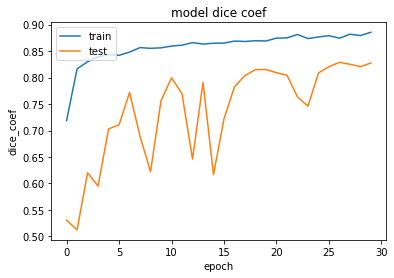

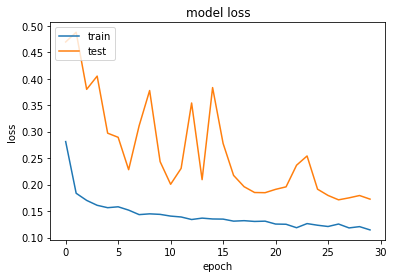

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['dice_coef'])
plt.plot(history.history['val_dice_coef'])
plt.title('model dice coef')
plt.ylabel('dice_coef')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
!unzip /content/drive/MyDrive/model.zip

Archive:  /content/drive/MyDrive/model.zip
  inflating: model (2).h5            


In [ ]:
model_tam.load_weights('/content/model (2).h5')

In [ ]:
FP=0
TN=0
TP=0
FN=0
i=225
for k in range(0,240):
  for j in range (0,240):
    if pred_tam[i,0,k,j] == 0 and seg_tam_test[i,0,k,j]==1:
      FP= FP+1
    elif pred_tam[i,0,k,j] == 1 and seg_tam_test[i,0,k,j]==0:
      FN=FN+1
    elif pred_tam[i,0,k,j] == 1 and seg_tam_test[i,0,k,j]==1:
      TP=TP+1
    elif pred_tam[i,0,k,j] == 0 and seg_tam_test[i,0,k,j]==0:
      TN=TN+1
sensitivity = (TP/(TP+FN))
print(sensitivity)

0.930379746835443


In [ ]:
im1 = np.asarray(pred_tam[225][0]>0.5).astype(np.bool)

In [ ]:
im2 = np.asarray(seg_tam_test[225][0]>0.5).astype(np.bool)

In [ ]:
def sensitivity(im1, im2, empty_score=1.0):
    im1 = np.asarray(im1>0.5).astype(np.bool)
    im2 = np.asarray(im2>0.5).astype(np.bool)
    FN=0

    if im1.shape != im2.shape:
        raise ValueError("Shape mismatch: im1 and im2 must have the same shape.")

    im_sum = im1.sum() + im2.sum()
    if im_sum == 0:
        return empty_score

    TP = np.logical_and(im1, im2)

    return TP.sum() / im2.sum()

In [ ]:
sensitivity(pred_tam[225][0],seg_tam_test[225][0])

0.9805081796032022

In [ ]:
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import concatenate, Conv2D, MaxPooling2D, Conv2DTranspose
from keras.layers import Input, merge, UpSampling2D,BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import tensorflow as tf


def dice_coef(y_true, y_pred):
    smooth = 0.005
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

K.set_image_data_format('channels_first')

def unet_model1():

    inputs = Input((1, 240 , 240))

    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same') (inputs)
    batch1 = BatchNormalization(axis=1)(conv1)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same') (batch1)
    batch1 = BatchNormalization(axis=1)(conv1)
    pool1 = MaxPooling2D((2, 2)) (batch1)

    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same') (pool1)
    batch2 = BatchNormalization(axis=1)(conv2)
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same') (batch2)
    batch2 = BatchNormalization(axis=1)(conv2)
    pool2 = MaxPooling2D((2, 2)) (batch2)

    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same') (pool2)
    batch3 = BatchNormalization(axis=1)(conv3)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same') (batch3)
    batch3 = BatchNormalization(axis=1)(conv3)
    pool3 = MaxPooling2D((2, 2)) (batch3)

    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same') (pool3)
    batch4 = BatchNormalization(axis=1)(conv4)
    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same') (batch4)
    batch4 = BatchNormalization(axis=1)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2)) (batch4)

    conv5 = Conv2D(1024, (3, 3), activation='relu', padding='same') (pool4)
    batch5 = BatchNormalization(axis=1)(conv5)
    conv5 = Conv2D(1024, (3, 3), activation='relu', padding='same') (batch5)
    batch5 = BatchNormalization(axis=1)(conv5)

    up6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same') (batch5)
    up6 = concatenate([up6, conv4], axis=1)
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same') (up6)
    batch6 = BatchNormalization(axis=1)(conv6)
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same') (batch6)
    batch6 = BatchNormalization(axis=1)(conv6)

    up7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same') (batch6)
    up7 = concatenate([up7, conv3], axis=1)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same') (up7)
    batch7 = BatchNormalization(axis=1)(conv7)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same') (batch7)
    batch7 = BatchNormalization(axis=1)(conv7)

    up8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (batch7)
    up8 = concatenate([up8, conv2], axis=1)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same') (up8)
    batch8 = BatchNormalization(axis=1)(conv8)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same') (batch8)
    batch8 = BatchNormalization(axis=1)(conv8)

    up9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (batch8)
    up9 = concatenate([up9, conv1], axis=1)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same') (up9)
    batch9 = BatchNormalization(axis=1)(conv9)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same') (batch9)
    batch9 = BatchNormalization(axis=1)(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(batch9)

    model = Model(inputs=[inputs], outputs=[conv10])

    model.compile(optimizer=Adam(lr=1e-4), loss=dice_coef_loss, metrics=[dice_coef])

    return model

In [ ]:
model_ödemsiz.compile(optimizer=Adam(lr=1e-4), loss=dice_coef_loss, metrics=[dice_coef])

In [ ]:
model_ödemsiz.save_weights("model_unet_cascade_odemsiz.h5")

In [ ]:
history = model_ödemsiz.fit(t1ce_tam, seg_ödemsiz,
          validation_data = (t1ce_tam_test,seg_ödemsiz_test),
          epochs = 30,
          batch_size = 3,
          shuffle = True)

Epoch 1/30
7894/7894 [==============================] - 805s 100ms/step - loss: 0.5998 - dice_coef: 0.4002 - val_loss: 0.6544 - val_dice_coef: 0.3455
Epoch 2/30
7894/7894 [==============================] - 783s 99ms/step - loss: 0.3021 - dice_coef: 0.6979 - val_loss: 0.9733 - val_dice_coef: 0.0267
Epoch 3/30
7894/7894 [==============================] - 783s 99ms/step - loss: 0.2834 - dice_coef: 0.7166 - val_loss: 0.2321 - val_dice_coef: 0.7680
Epoch 4/30
7894/7894 [==============================] - 784s 99ms/step - loss: 0.2749 - dice_coef: 0.7251 - val_loss: 0.9187 - val_dice_coef: 0.0813
Epoch 5/30
7894/7894 [==============================] - 784s 99ms/step - loss: 0.2733 - dice_coef: 0.7267 - val_loss: 0.3809 - val_dice_coef: 0.6191
Epoch 6/30
7894/7894 [==============================] - 783s 99ms/step - loss: 0.2666 - dice_coef: 0.7334 - val_loss: 0.2329 - val_dice_coef: 0.7671
Epoch 7/30
7894/7894 [==============================] - 781s 99ms/step - loss: 0.2626 - dice_coef: 0.7374

In [ ]:
model_ödemsiz = unet_model1()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model_genis = unet_model1()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model_genis.load_weights('/content/drive/MyDrive/model_unet_cascade_genis.h5')

In [ ]:
model_ödemsiz.load_weights('/content/drive/MyDrive/model_unet_cascade_odemsiz.h5')

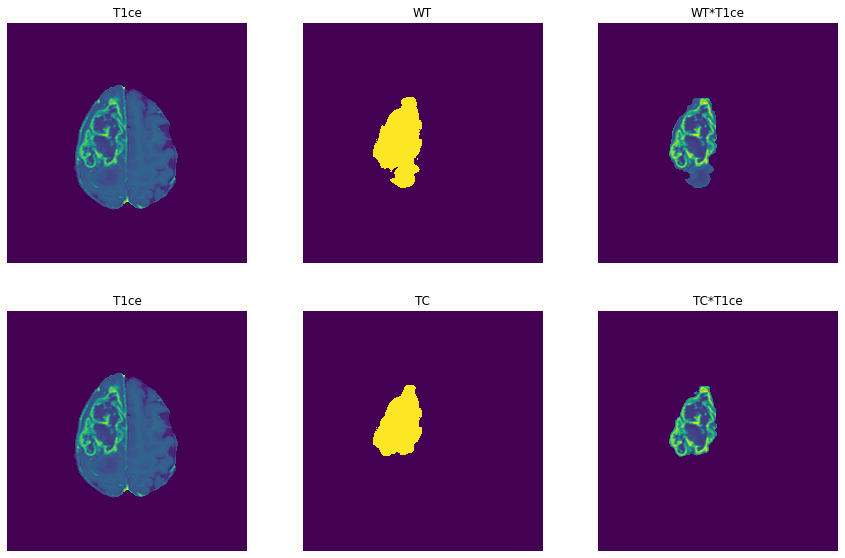

In [ ]:
i = 225
a=1
pred_tam = model_tam.predict(np.expand_dims(x_test[i,:,:,:],axis=0))
dst = pred_tam[0] * t1ce_test[i]

pred_ödemsiz = model_ödemsiz.predict(np.expand_dims(dst,axis=0))
dst2 = pred_ödemsiz[0] * t1ce_test[i]

plt.figure(figsize=(15,15))

plt.subplot(331)
plt.title('T1ce')
plt.axis('off')
plt.imshow(t1ce_test[i, 0, :, :], cmap= renk[a])

plt.subplot(332)
plt.title('WT')
plt.axis('off')
plt.imshow(seg_tam_test[i, 0, :, :], cmap= renk[a])

plt.subplot(333)
plt.title('WT*T1ce')
plt.axis('off')
plt.imshow(dst[0],cmap= renk[a])

plt.subplot(334)
plt.title('T1ce')
plt.axis('off')
plt.imshow(t1ce_test[i, 0, :, :], cmap= renk[a])

plt.subplot(335)
plt.title('TC')
plt.axis('off')
plt.imshow(seg_ödemsiz_test[i, 0, :, :], cmap= renk[a])

plt.subplot(336)
plt.title('TC*T1ce')
plt.axis('off')
plt.imshow(dst2[0],cmap= renk[a])

In [ ]:
def üstüne_ekle(pred_tam, pred_ödemsiz , pred_geniş ):

    total = np.zeros((1,1,240,240),np.float32)
    total[:,:,:,:] = pred_tam[:,:,:,:]

    for i in range(pred_ödemsiz.shape[0]):
        for j in range(240):
            for k in range(240):

                if pred_ödemsiz[i,0,j,k] != 0 and pred_tam[i,0,j,k] !=0:
                    total[i,0,j,k] = pred_ödemsiz[i,0,j,k]

                if pred_geniş[i,0,j,k] != 0 and pred_tam[i,0,j,k] !=0:
                    total[i,0,j,k] = pred_geniş[i,0,j,k]

    return total

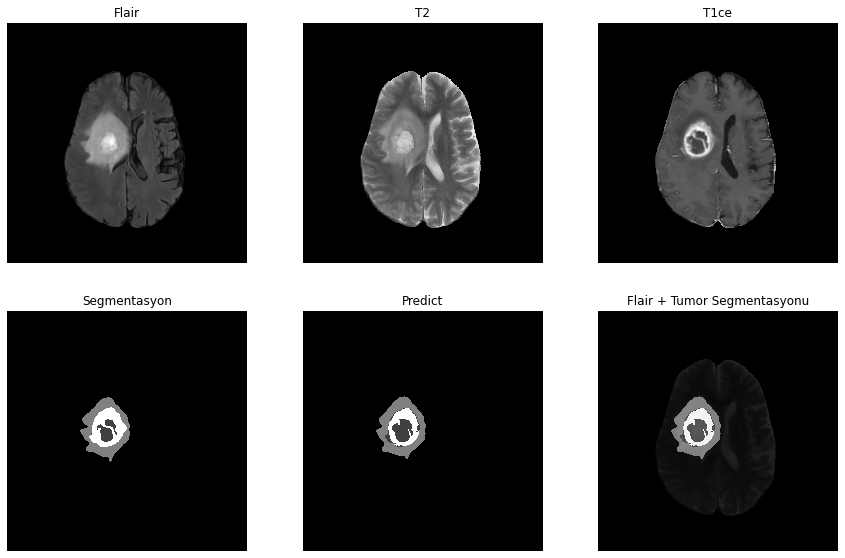

In [ ]:
renk = { 0:'magma',
        1:'viridis',
        2:'gray',
        3:'inferno',
        4:'cividis',
        5:'hot', }
a  = 2
x=197

pred_tam = model_tam.predict(np.expand_dims(x_test[x,:,:,:],axis=0))
t1ce_tam = pred_tam[0] * t1ce_test[x]
expand_img = np.expand_dims(t1ce_tam,axis=0)
pred_ödemsiz = model_ödemsiz.predict(expand_img)
t1ce_ödemsiz = pred_ödemsiz[0] * t1ce_test[x]
expand_img = np.expand_dims(t1ce_ödemsiz,axis=0)
pred_genis = model_genis.predict(expand_img)
pred_tam[pred_tam > 0.2] = 2
pred_tam[pred_tam != 2 ] = 0
pred_ödemsiz[pred_ödemsiz > 0.2] = 1
pred_ödemsiz[pred_ödemsiz != 1 ] = 0
pred_genis[pred_genis > 0.2] = 4
pred_genis[pred_genis != 4 ] = 0
seg = üstüne_ekle(pred_tam, pred_ödemsiz, pred_genis)
plt.figure(figsize=(15,15))

plt.subplot(331)
plt.title('Flair')
plt.axis('off')
plt.imshow(x_test[x, 0, :, :], cmap= renk[a])

plt.subplot(332)
plt.title('T2')
plt.axis('off')
plt.imshow(x_test[x, 1, :, :],cmap= renk[a])

plt.subplot(333)
plt.title('T1ce')
plt.axis('off')
plt.imshow(t1ce_test[x, 0, :, :],cmap= renk[a])

plt.subplot(334)
plt.title('Segmentasyon')
plt.axis('off')
plt.imshow(seg_orj[x, 0, :, :],cmap= renk[a])

plt.subplot(335)
plt.title('Predict')
plt.axis('off')
plt.imshow(seg[0, 0, :, :],cmap= renk[a])


plt.subplot(336)
plt.title('Flair + Tumor Segmentasyonu')
plt.axis('off')
y = cv2.addWeighted(x_test[x,1,:,:],0.1, seg[0,0,:,:], 0.9,0)
plt.imshow(y, cmap= renk[a])

In [ ]:
sensitivity, specificity, accuracy = calculate_sensitivity_specificity(seg_tam_test[x][0], pred_tam[0][0])
dice = compute_dice(seg_tam_test[x][0], pred_tam[0][0])
print ('WT Sensitivity:', sensitivity)
print ('WT Specificity:', specificity)
print ('WT Accuracy:', accuracy)
print ('WT Dice:', dice)
sensitivity, specificity, accuracy = calculate_sensitivity_specificity(seg_ödemsiz_test[x][0], pred_ödemsiz[0][0])
dice = compute_dice(seg_ödemsiz_test[x][0], pred_ödemsiz[0][0])
print ('TC Sensitivity:', sensitivity)
print ('TC Specificity:', specificity)
print ('TC Accuracy:', accuracy)
print ('TC Dice:', dice)
sensitivity, specificity, accuracy = calculate_sensitivity_specificity(seg_geniş_test[x][0], pred_genis[0][0])
dice = compute_dice(seg_geniş_test[x][0], pred_genis[0][0])
print ('ET Sensitivity:', sensitivity)
print ('ET Specificity:', specificity)
print ('ET Accuracy:', accuracy)
print ('ET Dice:', dice)

WT Sensitivity: 0.0
WT Specificity: 0.99911753052624
WT Accuracy: 0.9631423611111111
WT Dice: 0.9790815099783602
TC Sensitivity: 0.9664363277393879
TC Specificity: 0.9999646561931186
TC Accuracy: 0.999375
TC Dice: 0.9819458375125376
ET Sensitivity: 0.0
ET Specificity: 1.0
ET Accuracy: 0.9867361111111111
ET Dice: 0.8353658536585366


In [ ]:
from skimage import io, color, img_as_float
from skimage.exposure import adjust_gamma
def show_lable_on_image4(test_img, label_im):

    alpha = 0.8

    img = img_as_float(test_img/test_img.max())
    rows, cols = img.shape

    # Construct a colour image to superimpose
    color_mask = np.zeros((rows, cols, 3))
    red_multiplier = [1, 0.2, 0.2]
    green_multiplier = [0.35,0.75,0.25]
    blue_multiplier = [0,0.25,0.9]
    yellow_multiplier = [1,1,0.25]
    brown_miltiplier = [40./255, 26./255, 13./255]


    color_mask[label_im==1] = blue_multiplier#[1, 0, 0]  # Red block
    color_mask[label_im==2] = yellow_multiplier#[0, 1, 0] # Green block
    color_mask[label_im==3] = brown_miltiplier#[0, 0, 1] # Blue block
    color_mask[label_im==4] = green_multiplier#[0, 1, 1] # Blue block

    # Construct RGB version of grey-level image
    img_color = np.dstack((img, img, img))

    # Convert the input image and color mask to Hue Saturation Value (HSV)
    # colorspace
    img_hsv = color.rgb2hsv(img_color)
    color_mask_hsv = color.rgb2hsv(color_mask)

    # Replace the hue and saturation of the original image
    # with that of the color mask
    img_hsv[..., 0] = color_mask_hsv[..., 0]
    img_hsv[..., 1] = color_mask_hsv[..., 1] * alpha

    img_masked = color.hsv2rgb(img_hsv)

    return img_masked

In [ ]:
orj=show_lable_on_image4(x_test[197,0], seg[0,0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


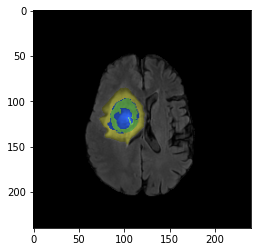

In [ ]:
plt.imshow(orj)

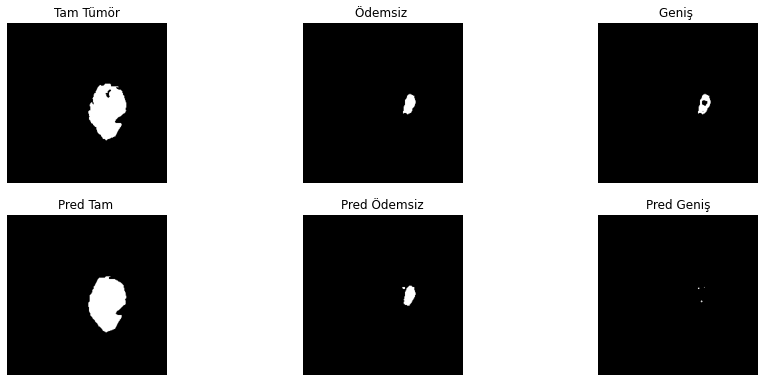

In [ ]:
renk = { 0:'magma',
        1:'viridis',
        2:'gray',
        3:'inferno',
        4:'cividis',
        5:'hot', }
a  = 2
x=1949

pred_tam = model_tam.predict(np.expand_dims(x_test[x,:,:,:],axis=0))
t1ce_tam = pred_tam[0] * t1ce_test[x]
expand_img = np.expand_dims(t1ce_tam,axis=0)
pred_ödemsiz = model_ödemsiz.predict(expand_img)
t1ce_ödemsiz = pred_ödemsiz[0] * t1ce_test[x]
expand_img = np.expand_dims(t1ce_ödemsiz,axis=0)
pred_genis = model_genis.predict(expand_img)
b = cv2.add(pred_tam, pred_ödemsiz)
c = cv2.add(pred_genis, b)
total = np.zeros((1,240,240),np.float32)
total = c
plt.figure(figsize=(15,10))

plt.subplot(331)
plt.title('Tam Tümör')
plt.axis('off')
plt.imshow(seg_tam_test[x,0 ,:,:],cmap= renk[a])

plt.subplot(332)
plt.title('Ödemsiz ')
plt.axis('off')
plt.imshow(seg_ödemsiz_test[x, 0, :, :],cmap= renk[a])

plt.subplot(333)
plt.title('Geniş ')
plt.axis('off')
plt.imshow(seg_geniş_test[x, 0, :, :],cmap= renk[a])


plt.subplot(334)
plt.title('Pred Tam ')
plt.axis('off')
plt.imshow(pred_tam[0,0,:,:],cmap= renk[a])


plt.subplot(335)
plt.title('Pred Ödemsiz')
plt.axis('off')
plt.imshow(pred_ödemsiz[ 0, 0, :, :],cmap= renk[a])


plt.subplot(336)
plt.title('Pred Geniş')
plt.axis('off')
plt.imshow(pred_genis[ 0, 0, :, :],cmap= renk[a])


In [ ]:
pred_tam = model_tam.predict(x_test)
t1ce_tam = pred_tam * t1ce_test
expand_img = np.expand_dims(t1ce_tam,axis=0)
pred_ödemsiz = model_ödemsiz.predict(t1ce_tam)
t1ce_ödemsiz = pred_ödemsiz*t1ce_test
expand_img = np.expand_dims(t1ce_ödemsiz,axis=0)
pred_geniş = model_genis.predict(t1ce_ödemsiz)

In [ ]:
pred_tam = model_tam.predict(x_test)

In [ ]:
calculate_sensitivity_specificity(seg_tam_test[225][0], pred_tam[225][0])

(0.9721545422902889, 0.005774115153397774, 0.053975694444444444)

In [ ]:
def calculate_sensitivity_specificity(y_test, y_pred_test):
    # Note: More parameters are defined than necessary.
    # This would allow return of other measures other than sensitivity and specificity

    # Get true/false for whether a breach actually occurred
    actual_pos = y_test == 1
    actual_neg = y_test == 0

    # Get true and false test (true test match actual, false tests differ from actual)
    true_pos = (y_pred_test == 1) & (actual_pos)
    false_pos = (y_pred_test == 1) & (actual_neg)
    true_neg = (y_pred_test == 0) & (actual_neg)
    false_neg = (y_pred_test == 0) & (actual_pos)

    # Calculate accuracy
    accuracy = np.mean(y_pred_test == y_test)

    # Calculate sensitivity and specificity
    sensitivity = np.sum(true_pos) / np.sum(actual_pos)
    specificity = np.sum(true_neg) / np.sum(actual_neg)

    return sensitivity, specificity, accuracy

In [ ]:
Y_pred = pred_tam

In [ ]:
Y_val = seg_tam_test

In [ ]:
print(FN)

209


In [ ]:
print(TP)

2793


In [ ]:
i=225
FP = len(np.where(Y_pred[i][0] - Y_val[i][0]  == -1)[0])
FN = len(np.where(Y_pred[i][0] - Y_val[i][0]  == 1)[0])
TP = len(np.where(Y_pred[i][0] + Y_val[i][0] == 2)[0])
TN = len(np.where(Y_pred[i][0] + Y_val[i][0] == 0)[0])
sensitivity = (TP/(TP+FN))
print(sensitivity)

0.930379746835443


In [ ]:
sum_sensitivity=0
mean_sensitivity=0
a=0
for i in range(0,len(seg_tam_test)):
  FP = len(np.where(Y_pred[i][0] - Y_val[i][0]  == -1)[0])
  FN = len(np.where(Y_pred[i][0] - Y_val[i][0]  == 1)[0])
  TP = len(np.where(Y_pred[i][0] + Y_val[i][0] == 2)[0])
  TN = len(np.where(Y_pred[i][0] + Y_val[i][0] == 0)[0])
  try:
    sensitivity = (TP/(TP+FN))
  except ZeroDivisionError:
    sensitivity = 0
  sum_sensitivity = sum_sensitivity + sensitivity
mean_sensitivity = sum_sensitivity / len(seg_tam_test)

In [ ]:
print(mean_sensitivity)

0.373878436960123


In [ ]:
sensitivity, specificity, accuracy = calculate_sensitivity_specificity(seg_tam_test[x][0], pred_tam[0][0])
dice = compute_dice(seg_tam_test[x][0], pred_tam[0][0])
print ('WT Sensitivity:', sensitivity)
print ('WT Specificity:', specificity)
print ('WT Accuracy:', accuracy)
print ('WT Dice:', dice)
sensitivity, specificity, accuracy = calculate_sensitivity_specificity(seg_ödemsiz_test[x][0], pred_ödemsiz[0][0])
dice = compute_dice(seg_ödemsiz_test[x][0], pred_ödemsiz[0][0])
print ('TC Sensitivity:', sensitivity)
print ('TC Specificity:', specificity)
print ('TC Accuracy:', accuracy)
print ('TC Dice:', dice)
sensitivity, specificity, accuracy = calculate_sensitivity_specificity(seg_geniş_test[x][0], pred_genis[0][0])
dice = compute_dice(seg_geniş_test[x][0], pred_genis[0][0])
print ('ET Sensitivity:', sensitivity)
print ('ET Specificity:', specificity)
print ('ET Accuracy:', accuracy)
print ('ET Dice:', dice)

WT Sensitivity: 0.9716923076923077
WT Specificity: 0.032585096596136155
WT Accuracy: 0.08557291666666667
WT Dice: 0.971150926207106
TC Sensitivity: 0.9064935064935065
TC Specificity: 0.014978589530717469
TC Accuracy: 0.0209375
TC Dice: 0.9427083333333334
ET Sensitivity: 0.0
ET Specificity: 0.9100750829404575
ET Accuracy: 0.9048611111111111
ET Dice: 0.03529411764705882


In [ ]:
def compute_dice(im1, im2, empty_score=1.0):
    im1 = np.asarray(im1>0.5).astype(np.bool)
    im2 = np.asarray(im2>0.5).astype(np.bool)

    if im1.shape != im2.shape:
        raise ValueError("Shape mismatch: im1 and im2 must have the same shape.")

    im_sum = im1.sum() + im2.sum()
    if im_sum == 0:
        return empty_score

    intersection = np.logical_and(im1, im2)

    return 2. * intersection.sum() / im_sum

In [ ]:
def calculate_sensitivity_specificity(y_test, y_pred_test):
    # Note: More parameters are defined than necessary.
    # This would allow return of other measures other than sensitivity and specificity

    # Get true/false for whether a breach actually occurred
    actual_pos = y_test == 1
    actual_neg = y_test == 0

    # Get true and false test (true test match actual, false tests differ from actual)
    true_pos = (y_pred_test == 1) & (actual_pos)
    false_pos = (y_pred_test == 1) & (actual_neg)
    true_neg = (y_pred_test == 0) & (actual_neg)
    false_neg = (y_pred_test == 0) & (actual_pos)

    # Calculate accuracy
    accuracy = np.mean(y_pred_test == y_test)

    # Calculate sensitivity and specificity
    sensitivity = np.sum(true_pos) / np.sum(actual_pos)
    specificity = np.sum(true_neg) / np.sum(actual_neg)

    return sensitivity, specificity, accuracy

Tam Tümör

In [ ]:
sum_dice=0
mean_dice=0
for i in range(1,len(seg_tam_test)):
  pred_tam = model_tam.predict(x_test[i-1:i,:,:,:])
  pred_tam[pred_tam > 0.2] = 2
  pred_tam[pred_tam != 2 ] = 0
  dice = compute_dice(pred_tam[0,0,:,:],seg_tam_test[i,0,:,:])
  sum_dice = sum_dice + dice
mean_dice = sum_dice / len(seg_tam_test)
print(mean_dice)

0.8203716897057176


In [ ]:
sum_sensitivity=0
mean_sensitivity=0
sum_specifity=0
mean_specifity=0
sum_accuracy=0
mean_accuracy=0
sum_dice=0
mean_dice=0
for i in range(0,len(seg_tam_test)):
  pred_tam = model_tam.predict(np.expand_dims(x_test[i,:,:,:],axis=0))
  pred_tam[pred_tam > 0.2] = 2
  pred_tam[pred_tam != 2 ] = 0
  dice = compute_dice(pred_tam[0,0,:,:],seg_tam_test[i,0,:,:])
  sensitivity, specifity, accuracy = calculate_sensitivity_specificity(seg_tam_test[i][0], pred_tam[0][0])
  sum_dice = sum_dice + dice
  sum_sensitivity = sum_sensitivity + sensitivity
  sum_specifity = sum_specifity + specifity
  sum_accuracy = sum_accuracy + accuracy
mean_dice = sum_dice / len(seg_tam_test)
mean_sensitivity = sum_sensitivity / len(seg_tam_test)
mean_specifity = sum_specifity / len(seg_tam_test)
mean_accuracy = sum_accuracy / len(seg_tam_test)

print(mean_dice, mean_sensitivity, mean_specifity, mean_accuracy)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in long_scalars


0.8328462865161715 nan 0.9988931344029003 0.9761910078957416


Tümör Merkezi (Ödemsiz Tümör)

In [ ]:
sum_sensitivity=0
mean_sensitivity=0
sum_specifity=0
mean_specifity=0
sum_accuracy=0
mean_accuracy=0
sum_dice=0
mean_dice=0
a=0
for i in range(0,len(seg_tam_test)):
  pred_tam = model_tam.predict(np.expand_dims(x_test[i,:,:,:],axis=0))
  t1ce_tam = pred_tam[0] * t1ce_test[i]
  expand_img = np.expand_dims(t1ce_tam,axis=0)
  pred_ödemsiz = model_ödemsiz.predict(expand_img)
  pred_ödemsiz[pred_ödemsiz > 0.2] = 1
  pred_ödemsiz[pred_ödemsiz != 1 ] = 0
  dice = compute_dice(pred_ödemsiz[0,0,:,:],seg_ödemsiz_test[i,0,:,:])
  sensitivity, specifity, accuracy = calculate_sensitivity_specificity(seg_ödemsiz_test[i][0], pred_ödemsiz[0][0])
  sum_dice = sum_dice + dice
  if sensitivity != 'nan':
    sum_sensitivity = sum_sensitivity + sensitivity
    a=a+1

  sum_specifity = sum_specifity + specifity
  sum_accuracy = sum_accuracy + accuracy
mean_dice = sum_dice / len(seg_ödemsiz_test)
mean_sensitivity = sum_sensitivity / a
mean_specifity = sum_specifity / len(seg_ödemsiz_test)
mean_accuracy = sum_accuracy / len(seg_ödemsiz_test)

print(mean_dice, mean_sensitivity, mean_specifity, mean_accuracy)

NameError: ignored

Genişleyen Tümör

In [ ]:
sum_sensitivity=0
mean_sensitivity=0
sum_specifity=0
mean_specifity=0
sum_accuracy=0
mean_accuracy=0
sum_dice=0
mean_dice=0
for i in range(0,len(seg_tam_test)):
  pred_tam = model_tam.predict(np.expand_dims(x_test[i,:,:,:],axis=0))
  t1ce_tam = pred_tam[0] * t1ce_test[i]
  expand_img = np.expand_dims(t1ce_tam,axis=0)
  pred_ödemsiz = model_ödemsiz.predict(expand_img)
  t1ce_ödemsiz = pred_ödemsiz[0]*t1ce_test[i]
  expand_img = np.expand_dims(t1ce_ödemsiz,axis=0)
  pred_geniş = model_genis.predict(expand_img)
  pred_geniş[pred_geniş > 0.2] = 4
  pred_geniş[pred_geniş != 4 ] = 0
  dice = compute_dice(pred_geniş[0,0,:,:],seg_geniş_test[i,0,:,:])
  sensitivity, specifity, accuracy = calculate_sensitivity_specificity(seg_geniş_test[i][0], pred_geniş[0][0])
  sum_dice = sum_dice + dice
  sum_sensitivity = sum_sensitivity + sensitivity
  sum_specifity = sum_specifity + specifity
  sum_accuracy = sum_accuracy + accuracy
mean_dice = sum_dice / len(seg_ödemsiz_test)
mean_sensitivity = sum_sensitivity / len(seg_ödemsiz_test)
mean_specifity = sum_specifity / len(seg_ödemsiz_test)
mean_accuracy = sum_accuracy / len(seg_ödemsiz_test)

print(mean_dice, mean_sensitivity, mean_specifity, mean_accuracy)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in long_scalars


0.6750193786241216 nan 0.9999838162964488 0.9969173087899539


In [ ]:
sum_dice=0
mean_dice=0
for i in range(1,len(seg_tam_test)):
  pred_tam = model_tam.predict(np.expand_dims(x_test[i,:,:,:],axis=0))
  t1ce_tam = pred_tam[0] * t1ce_test[i]
  expand_img = np.expand_dims(t1ce_tam,axis=0)
  pred_ödemsiz = model_ödemsiz.predict(expand_img)
  t1ce_ödemsiz = pred_ödemsiz[0] * t1ce_test[i]
  expand_img = np.expand_dims(t1ce_ödemsiz,axis=0)
  pred_geniş = model_genis.predict(expand_img)
  pred_geniş[pred_geniş > 0.2] = 4
  pred_geniş[pred_geniş != 4 ] = 0
  dice = compute_dice(pred_geniş[0,0,:,:],seg_geniş_test[i,0,:,:])
  sum_dice = sum_dice + dice
mean_dice = sum_dice / len(seg_geniş_test)
print(mean_dice)

0.6748481457474094
